In [ ]:
import pandas as pd
import numpy as np

In [ ]:
df = pd.read_excel('Copper_Set.xlsx')

In [ ]:
df.head()

,id,item_date,quantity tons,customer,country,status,item type,application,thickness,width,material_ref,product_ref,delivery date,selling_price
0,EC06F063-9DF0-440C-8764-0B0C05A4F6AE,20210401.0,54.151139,30156308.0,28.0,Won,W,10.0,2.00,1500.0,DEQ1 S460MC,1670798778,20210701.0,854.00
1,4E5F4B3D-DDDF-499D-AFDE-A3227EC49425,20210401.0,768.024839,30202938.0,25.0,Won,W,41.0,0.80,1210.0,0000000000000000000000000000000000104991,1668701718,20210401.0,1047.00
2,E140FF1B-2407-4C02-A0DD-780A093B1158,20210401.0,386.127949,30153963.0,30.0,Won,WI,28.0,0.38,952.0,S0380700,628377,20210101.0,644.33
3,F8D507A0-9C62-4EFE-831E-33E1DA53BB50,20210401.0,202.411065,30349574.0,32.0,Won,S,59.0,2.30,1317.0,DX51D+ZM310MAO 2.3X1317,1668701718,20210101.0,768.00
4,4E1C4E78-152B-430A-8094-ADD889C9D0AD,20210401.0,785.526262,30211560.0,28.0,Won,W,10.0,4.00,2000.0,2_S275JR+AR-CL1,640665,20210301.0,577.00


In [ ]:
df.columns

Index(['id', 'item_date', 'quantity tons', 'customer', 'country', 'status',
       'item type', 'application', 'thickness', 'width', 'material_ref',
       'product_ref', 'delivery date', 'selling_price'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181673 entries, 0 to 181672
Data columns (total 14 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   id             181671 non-null  object 
 1   item_date      181672 non-null  float64
 2   quantity tons  181673 non-null  object 
 3   customer       181672 non-null  float64
 4   country        181645 non-null  float64
 5   status         181671 non-null  object 
 6   item type      181673 non-null  object 
 7   application    181649 non-null  float64
 8   thickness      181672 non-null  float64
 9   width          181673 non-null  float64
 10  material_ref   103754 non-null  object 
 11  product_ref    181673 non-null  int64  
 12  delivery date  181672 non-null  float64
 13  selling_price  181672 non-null  float64
dtypes: float64(8), int64(1), object(5)
memory usage: 19.4+ MB


<Axes: >

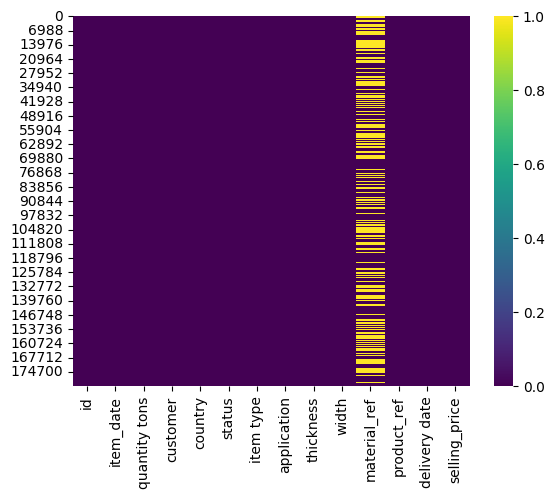

In [ ]:
import seaborn as sns
sns.heatmap(df.isnull(),cmap = 'viridis')

In [ ]:
df.duplicated().sum()

0

# Replacing the rubbish values in material ref column with nan


In [ ]:
df['material_ref'] = df['material_ref'].apply(lambda x : np.nan if str(x).startswith('000000') else x)

In [ ]:
#Dropping id and material ref columns

df.drop(columns=['id','material_ref','customer'], inplace=True)

In [ ]:
df = df[df['status'].isin(['Won', 'Lost'])]

In [ ]:
df['status'].unique()

array(['Won', 'Lost'], dtype=object)

In [ ]:
df['quantity tons'] = pd.to_numeric(df['quantity tons'],errors='coerce')
df['item_date'] = pd.to_datetime(df['item_date'], format='%Y%m%d',errors='coerce').dt.date
df['delivery date'] = pd.to_datetime(df['delivery date'], format='%Y%m%d',errors='coerce').dt.date
df['quantity tons']= df['quantity tons'].round(2)
df.head()

,item_date,quantity tons,country,status,item type,application,thickness,width,product_ref,delivery date,selling_price
0,2021-04-01,54.15,28.0,Won,W,10.0,2.00,1500.0,1670798778,2021-07-01,854.00
1,2021-04-01,768.02,25.0,Won,W,41.0,0.80,1210.0,1668701718,2021-04-01,1047.00
2,2021-04-01,386.13,30.0,Won,WI,28.0,0.38,952.0,628377,2021-01-01,644.33
3,2021-04-01,202.41,32.0,Won,S,59.0,2.30,1317.0,1668701718,2021-01-01,768.00
4,2021-04-01,785.53,28.0,Won,W,10.0,4.00,2000.0,640665,2021-03-01,577.00


In [ ]:
df.describe()

,quantity tons,country,application,thickness,width,product_ref,selling_price
count,150447.000000,150444.000000,150445.000000,150448.000000,150448.000000,1.504480e+05,150447.0000
mean,94.458736,45.391089,25.195108,2.618359,1297.840286,4.748400e+08,825.7639
std,440.947281,24.488194,17.640288,7.115448,266.156482,7.172630e+08,290.8797
min,-2000.000000,25.000000,2.000000,0.180000,1.000000,6.117280e+05,-1160.0000
25%,10.700000,26.000000,10.000000,0.740000,1176.000000,6.283770e+05,671.0000
50%,29.930000,30.000000,15.000000,1.500000,1250.000000,6.406650e+05,811.0000
75%,64.870000,78.000000,41.000000,3.000000,1500.000000,1.332077e+09,951.0000
max,70252.360000,113.000000,99.000000,2500.000000,2990.000000,1.722208e+09,81236.1400


In [ ]:
# dropping the rows with negative values, as price and quantity cannot be negative

df = df[(df['quantity tons']>0) & (df['selling_price']>0)]

In [ ]:
df.isna().sum()

,0
item_date,3
quantity tons,0
country,4
status,0
item type,0
application,3
thickness,0
width,0
product_ref,0
delivery date,2


In [ ]:
df[['item_date','delivery date','status','country','application']].mode()

,item_date,delivery date,status,country,application
0,2020-12-02,2021-01-01,Won,78.0,10.0


In [ ]:
na = ['item_date','delivery date','status','country','application']
for i in na:
    df[i].fillna(df[i].mode().iloc[0],inplace=True)

<ipython-input-17-a0a8f7a6679f>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[i].fillna(df[i].mode().iloc[0],inplace=True)


In [ ]:
df.isnull().sum()

,0
item_date,0
quantity tons,0
country,0
status,0
item type,0
application,0
thickness,0
width,0
product_ref,0
delivery date,0


# Label Encoding

In [ ]:
from sklearn.preprocessing import LabelEncoder
lab_en = LabelEncoder()

df['item type'] = lab_en.fit_transform(df['item type'])
df['status'] = lab_en.fit_transform(df['status'])
df[['status','item type']].head()

,status,item type
0,1,5
1,1,5
2,1,6
3,1,3
4,1,5


In [ ]:
df.dtypes

,0
item_date,object
quantity tons,float64
country,float64
status,int64
item type,int64
application,float64
thickness,float64
width,float64
product_ref,int64
delivery date,object


In [ ]:
df.shape

(150433, 11)

# Skewness in data
1. With Pandas skew() function

In [ ]:
df_trans = df.copy()

In [ ]:
df1 = df_trans[['quantity tons','thickness','width','selling_price']]
old_skew = df1.skew().sort_values(ascending=False)
old_skew

,0
selling_price,141.499113
quantity tons,53.802246
thickness,17.120934
width,0.352644


Positive value means the distribution is skewed to the right.
Negative value means the distribution is skewed to the left.
0 means perfect normal distribution. The bell shaped curve.
Thus from the above values the columns selling price, quantity tons, thickness are right skewed and width column is somewhat normalized. Hence applying boxcox Transform to the three columns.

# Box Cox Transform

In [ ]:
from scipy import stats
list = ['quantity tons','thickness','selling_price']
for i in list:
    df_trans[i] ,param = stats.boxcox(df_trans[i])
    print(f'Optimal lambda for {i}:', param)

Optimal lambda for quantity tons: 0.005918185978939202
Optimal lambda for thickness: -0.17925946271152296
Optimal lambda for selling_price: 0.09342483997462468


In [ ]:
df1 = df_trans[['quantity tons','thickness','width','selling_price']]
old_skew = df1.skew().sort_values(ascending=False)
old_skew

,0
width,0.352644
thickness,0.053432
selling_price,0.044552
quantity tons,0.003019


# Plotting the distribution plots before and After Transform

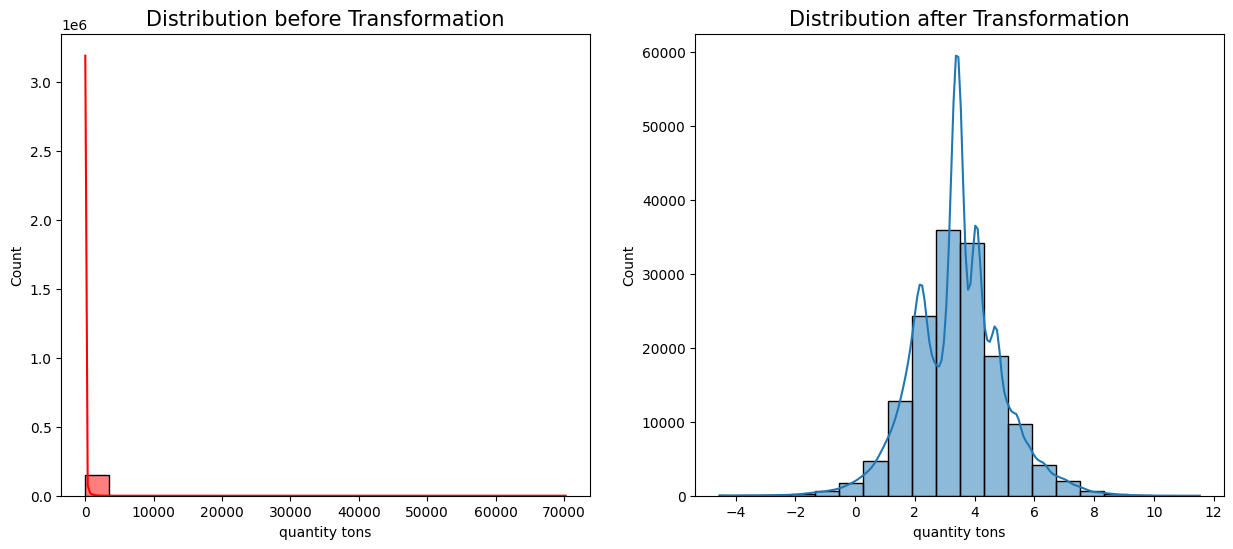

In [ ]:
import matplotlib.pyplot as plt
def plot(column):

    plt.figure(figsize=(15,6))
    plt.subplot(1,2,1)
    plt.title("Distribution before Transformation", fontsize=15)
    sns.histplot(df[column],bins=20 ,kde=True, color="red")

    plt.subplot(1,2,2)
    plt.title("Distribution after Transformation", fontsize=15)
    sns.histplot(df_trans[column],bins=20, kde=True , legend=False)
    plt.xlabel(column)
    plt.show()


plot(column="quantity tons")

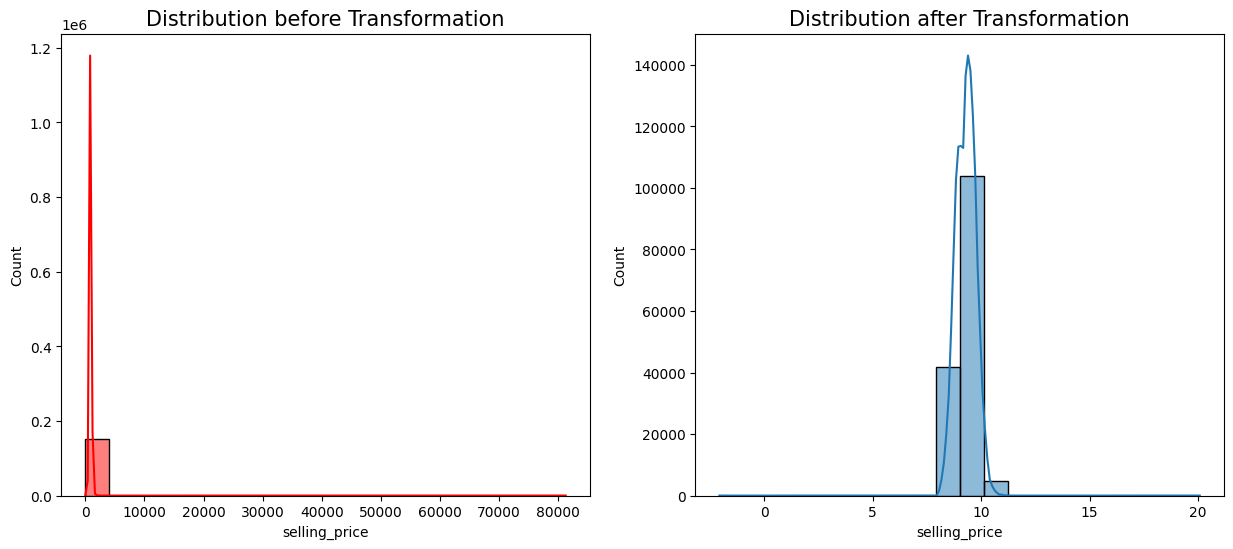

In [ ]:
plot(column='selling_price')

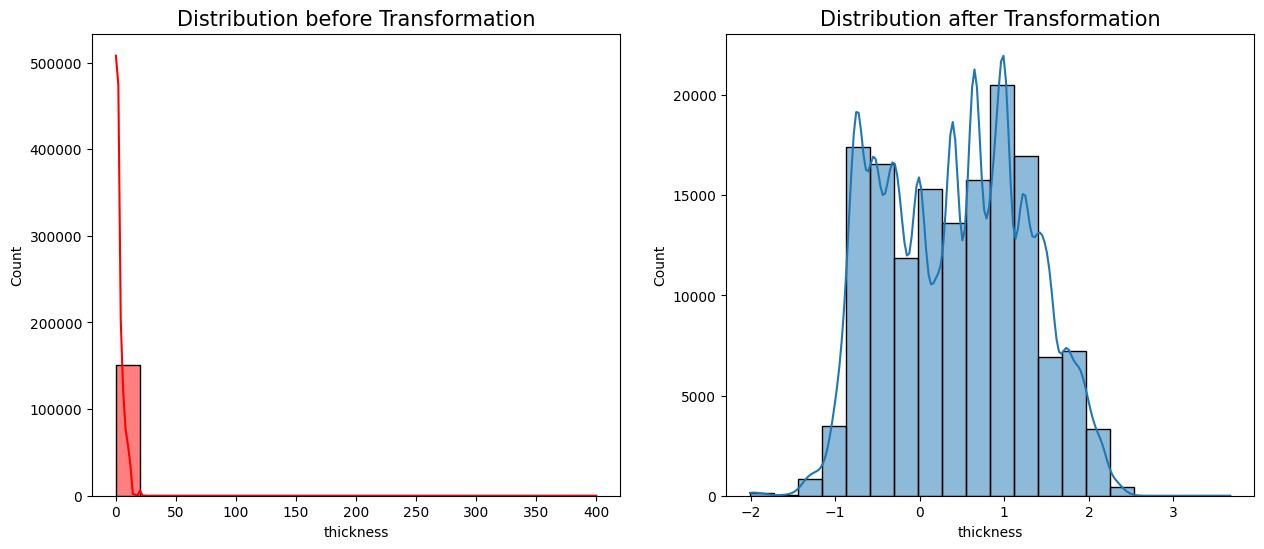

In [ ]:
plot(column='thickness')

# Outlier Detection

# With Boxplot

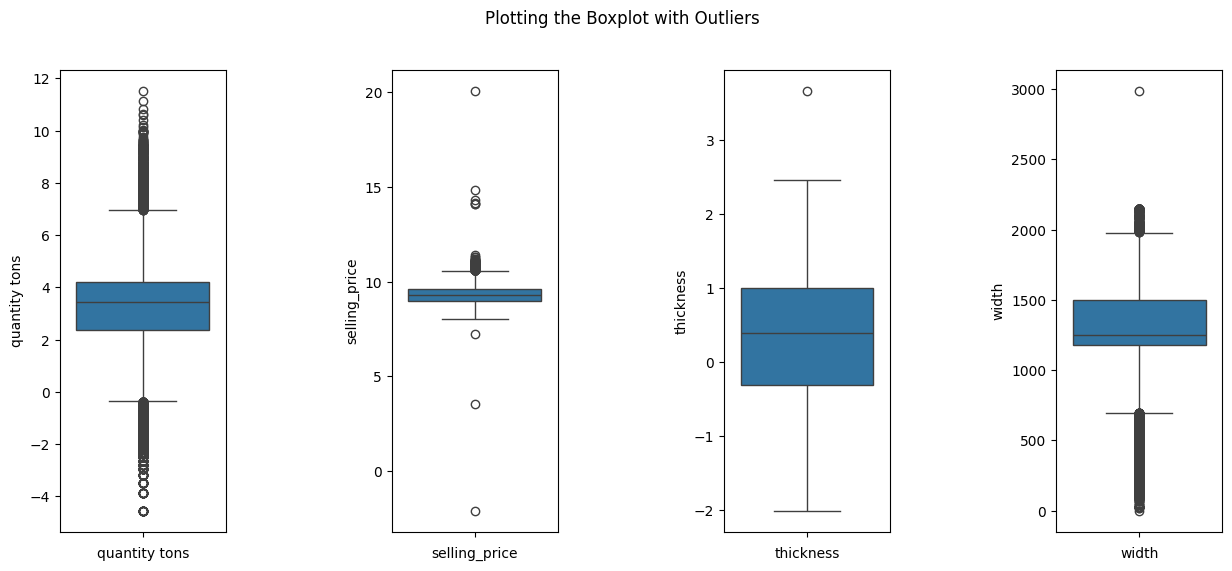

In [ ]:
import matplotlib.pyplot as plt
# initialize figure with 6 subplots in a row
fig, ax = plt.subplots(1, 4,figsize=(15, 6))
fig.suptitle('Plotting the Boxplot with Outliers')
# add padding between the subplots
plt.subplots_adjust(wspace=1)

box_list = ['quantity tons','selling_price','thickness','width']

# draw boxplot for each column in the each subplot
for i,val in enumerate(box_list):
    sns.boxplot(data=df_trans[val], ax=ax[i])
    ax[i].set_xlabel(val)

# Outlier Treatment

Using Log Transform, inverse Transform or Boxcox, did not effectively treat the outliers in the quantity tons,selling price, width, thickness columns. Hence using the IQR(Inter quartile Range Method)

In [ ]:
box_list = ['quantity tons','selling_price','thickness','width']
for column in box_list:
    # IQR Detection
    # Calculate the upper and lower limits
    Q1 = df_trans[column].quantile(0.25)
    Q3 = df_trans[column].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5*IQR
    upper = Q3 + 1.5*IQR
    df_trans[column] = df_trans[column].clip(lower, upper)

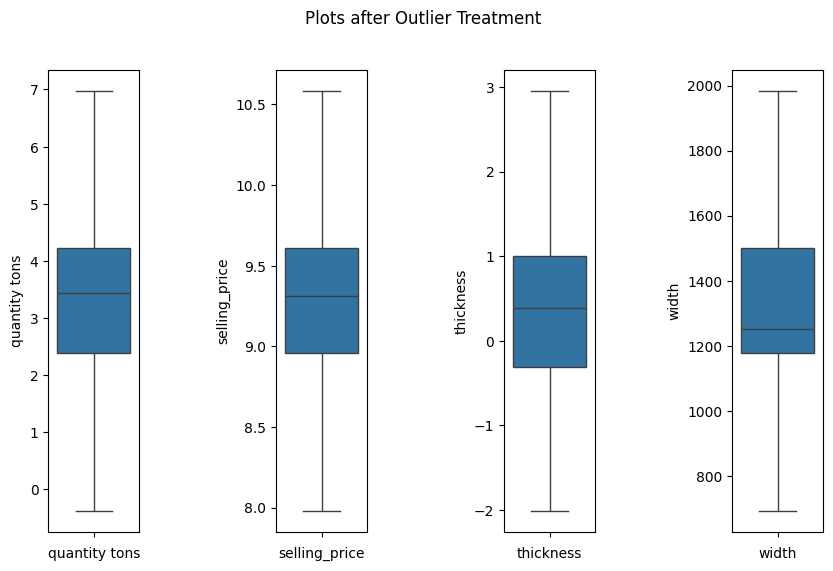

In [ ]:
fig, ax = plt.subplots(1,4,figsize=(10,6))
fig.suptitle('Plots after Outlier Treatment')
# add padding between the subplots
plt.subplots_adjust(wspace=1.5)

box_list = ['quantity tons','selling_price','thickness','width']

# draw boxplot for each column in the each subplot
for i,val in enumerate(box_list):
    sns.boxplot(data=df_trans[val], ax=ax[i])
    ax[i].set_xlabel(val)

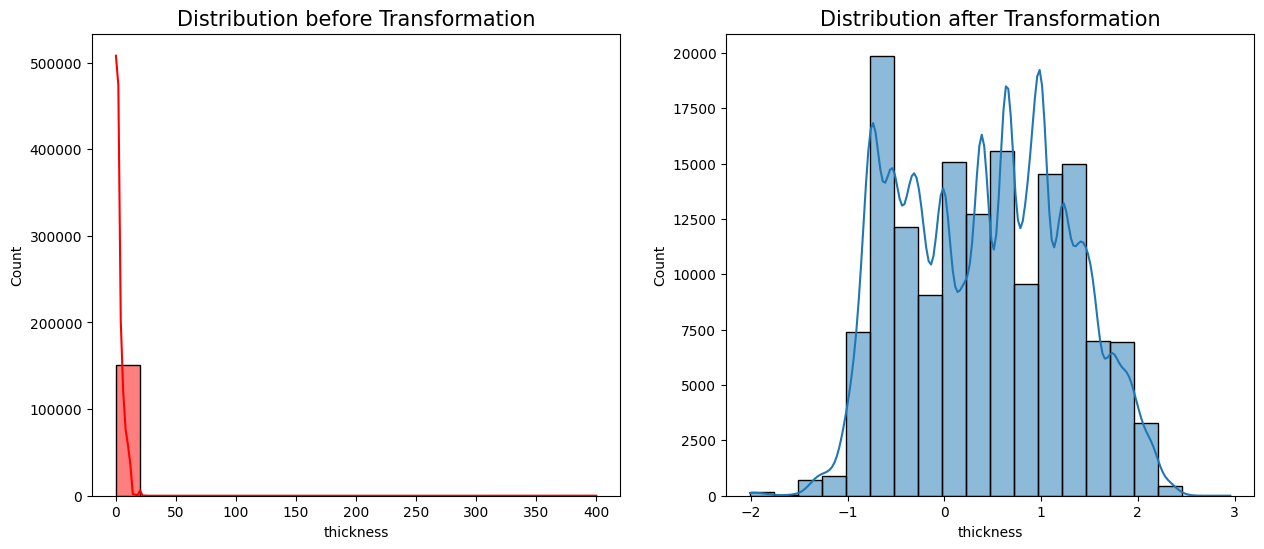

In [ ]:
plot(column='thickness')

In [ ]:
df_trans['quantity tons'] = df_trans['quantity tons'].round(2)
df_trans['thickness'] = df_trans['thickness'].round(2)
df_trans['selling_price'] = df_trans['selling_price'].round(2)
df_trans.head()

,item_date,quantity tons,country,status,item type,application,thickness,width,product_ref,delivery date,selling_price
0,2021-04-01,4.04,28.0,1,5,10.0,0.65,1500.0,1670798778,2021-07-01,9.41
1,2021-04-01,6.78,25.0,1,5,41.0,-0.23,1210.0,1668701718,2021-04-01,9.79
2,2021-04-01,6.06,30.0,1,6,28.0,-1.06,952.0,628377,2021-01-01,8.88
3,2021-04-01,5.39,32.0,1,3,59.0,0.77,1317.0,1668701718,2021-01-01,9.21
4,2021-04-01,6.80,28.0,1,5,10.0,1.23,1984.5,640665,2021-03-01,8.68


In [ ]:
corr = df_trans.drop(columns=['item_date','delivery date']).corr()
corr

,quantity tons,country,status,item type,application,thickness,width,product_ref,selling_price
quantity tons,1.000000,-0.081227,-0.118232,-0.320027,0.069285,0.034933,0.035107,0.054288,-0.077477
country,-0.081227,1.000000,0.094725,0.103666,-0.035655,-0.056438,0.054379,-0.152589,-0.019342
status,-0.118232,0.094725,1.000000,0.234302,0.177271,-0.167361,-0.125697,-0.081089,0.044606
item type,-0.320027,0.103666,0.234302,1.000000,0.168065,-0.107997,-0.094531,-0.085006,0.121677
application,0.069285,-0.035655,0.177271,0.168065,1.000000,-0.206329,-0.206821,-0.116580,0.148134
thickness,0.034933,-0.056438,-0.167361,-0.107997,-0.206329,1.000000,0.392280,0.253254,-0.485167
width,0.035107,0.054379,-0.125697,-0.094531,-0.206821,0.392280,1.000000,-0.029790,-0.185332
product_ref,0.054288,-0.152589,-0.081089,-0.085006,-0.116580,0.253254,-0.029790,1.000000,-0.083147
selling_price,-0.077477,-0.019342,0.044606,0.121677,0.148134,-0.485167,-0.185332,-0.083147,1.000000


<Axes: >

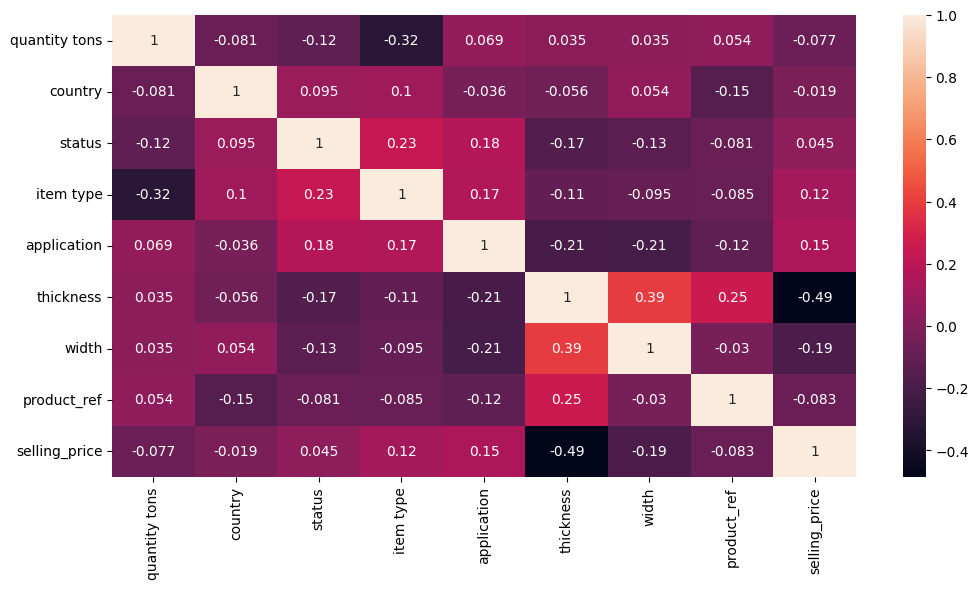

In [ ]:
plt.figure(figsize=(12,6))
sns.heatmap(corr,annot=True)

In [ ]:
df_trans.to_csv('Copper.csv',index = False)